In [3]:
import pandas as pd #for reading and working with data
import matplotlib.pyplot as plt #for visuals
import seaborn as sns #for visuals
import numpy as np #for doing math/stat calculations, working with arrays

# import quandl #for downloading data from Quandl website
from pandas_datareader import data #for downloading data from Yahoo Finance website

##plotly is for interactive plotting
from plotly.offline import iplot
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go #the basic charts that we will use are mainly stored under graph_objs
init_notebook_mode(connected=True) #if we want the charts to be displayed in JN

import datetime

In [4]:
data = pd.read_excel(r"C:\Users\User\Desktop\1.xlsx")

In [5]:
data.head(4)

,User Id,AGE,Gender,Date Registered,First Active Date,Days Last Played,Days Last Act,Avg Dep,Avg Ggr,New United Vip Status,...,2021avg_de,2020avg_ggr,2021avg_ggr,2020avg_ggr_count,2021avg_ggr_count,2020avg_de_count,2021avg_de_count,GGR_count,Dep Count,Churned
0,1,51,Male,2020-01-01,2020-01-02,1,1,2269,626,Not_VIP,...,4835.4,434.166667,976.5,20.583333,16.3,19.583333,15.0,410.0,385.0,Yes
1,2,44,Female,2020-01-01,NaT,-1,-1,0,0,Not_VIP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Did not play
2,3,29,Male,2020-01-01,NaT,-1,-1,0,0,Not_VIP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Did not play
3,4,35,Male,2020-01-01,NaT,-1,-1,0,0,Not_VIP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Did not play


In [6]:
data.shape

(25471, 23)

The data has 23 columns initially and 25471 rows

In [9]:
data.columns

Index(['User Id', 'AGE', 'Gender', 'Date Registered', 'First Active Date',
       'Days Last Played', 'Days Last Act', 'Avg Dep', 'Avg Ggr',
       'New United Vip Status', 'Self Blocked', 'Is Verified', '2020avg_de',
       '2021avg_de', '2020avg_ggr', '2021avg_ggr', '2020avg_ggr_count',
       '2021avg_ggr_count', '2020avg_de_count', '2021avg_de_count',
       'GGR_count', 'Dep Count', 'Churned'],
      dtype='object')

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25471 entries, 0 to 25470
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   User Id                25471 non-null  int64         
 1   AGE                    25471 non-null  int64         
 2   Gender                 25471 non-null  object        
 3   Date Registered        25471 non-null  datetime64[ns]
 4   First Active Date      17459 non-null  datetime64[ns]
 5   Days Last Played       25471 non-null  int64         
 6   Days Last Act          25471 non-null  int64         
 7   Avg Dep                25471 non-null  int64         
 8   Avg Ggr                25471 non-null  int64         
 9   New United Vip Status  25471 non-null  object        
 10  Self Blocked           25471 non-null  object        
 11  Is Verified            25471 non-null  object        
 12  2020avg_de             8879 non-null   float64       
 13  2

In [11]:
data.isna().sum()

User Id                      0
AGE                          0
Gender                       0
Date Registered              0
First Active Date         8012
Days Last Played             0
Days Last Act                0
Avg Dep                      0
Avg Ggr                      0
New United Vip Status        0
Self Blocked                 0
Is Verified                  0
2020avg_de               16592
2021avg_de               10168
2020avg_ggr              16592
2021avg_ggr              10168
2020avg_ggr_count        16592
2021avg_ggr_count        10168
2020avg_de_count         16592
2021avg_de_count         10168
GGR_count                 8012
Dep Count                 8012
Churned                      0
dtype: int64

As we can see, some of the variables are missing (nulls). Let's understand the cases and find out how to work with them. 

In [12]:
data.describe()

,User Id,AGE,Days Last Played,Days Last Act,Avg Dep,Avg Ggr,2020avg_de,2021avg_de,2020avg_ggr,2021avg_ggr,2020avg_ggr_count,2021avg_ggr_count,2020avg_de_count,2021avg_de_count,GGR_count,Dep Count
count,25471.000000,25471.000000,25471.000000,25471.000000,25471.000000,25471.000000,8879.000000,15303.000000,8879.000000,15303.000000,8879.000000,15303.000000,8879.000000,15303.000000,17459.000000,17459.000000
mean,12736.000000,35.720545,74.219151,72.628165,306.274312,67.031644,282.194883,396.772332,86.145735,89.724246,6.956720,8.026192,5.279575,6.296705,72.559883,56.403059
std,7352.988689,11.998990,148.491551,146.626239,2708.403635,765.375709,1926.499181,2916.451448,811.801837,1044.848029,5.885229,6.106622,5.432433,5.896991,90.281001,80.210066
min,1.000000,-1.000000,-1.000000,-1.000000,0.000000,-29662.000000,0.000000,0.000000,-24718.333333,-19085.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6368.500000,26.000000,-1.000000,-1.000000,0.000000,0.000000,6.500000,6.000000,2.500000,0.500000,2.400000,3.333333,1.500000,1.714286,9.000000,6.000000
50%,12736.000000,33.000000,2.000000,2.000000,13.000000,2.000000,29.500000,39.000000,13.000000,10.000000,5.000000,6.250000,3.000000,4.000000,38.000000,22.000000
75%,19103.500000,42.000000,60.000000,57.000000,103.000000,32.000000,117.267857,187.950000,48.666667,53.000000,9.763889,11.454545,7.000000,9.181818,101.000000,74.000000
max,25471.000000,248.000000,680.000000,680.000000,227270.000000,42160.000000,129491.363636,160736.727273,56461.727273,100489.727273,30.666667,28.545455,30.666667,28.272727,630.000000,625.000000


In [116]:
print('Duplicates:', data.duplicated().sum())

Duplicates: 0


The data does not contain any duplicates, means, we can start working with them 

In [117]:
data[data["User Id"].isna()]

,User Id,AGE,Gender,Date Registered,First Active Date,Days Last Played,Days Last Act,Avg Dep,Avg Ggr,New United Vip Status,...,2021avg_de,2020avg_ggr,2021avg_ggr,2020avg_ggr_count,2021avg_ggr_count,2020avg_de_count,2021avg_de_count,GGR_count,Dep Count,Churned


In [118]:
data.duplicated(["User Id"]).sum()

0

Also, most importantly, no User ID is null, so we do not need to drop it. Also, there are no duplicate User IDs. 

In [119]:
data.isna().sum()

User Id                      0
AGE                          0
Gender                       0
Date Registered              0
First Active Date         8012
Days Last Played             0
Days Last Act                0
Avg Dep                      0
Avg Ggr                      0
New United Vip Status        0
Self Blocked                 0
Is Verified                  0
2020avg_de               16592
2021avg_de               10168
2020avg_ggr              16592
2021avg_ggr              10168
2020avg_ggr_count        16592
2021avg_ggr_count        10168
2020avg_de_count         16592
2021avg_de_count         10168
GGR_count                 8012
Dep Count                 8012
Churned                      0
dtype: int64

By the company's definition, if we do not have an "active date", means the user did not play. They may have made some small deposits or have checked how the website works, but they never played. A date is considered to be an active, if a user has played at least once. As a result, we are dropping all the rows, where the active date is null (NaN). We cannot assume if they are going to play or not in the future. 

## Let's start the data cleaning

In [120]:
data = data[data['First Active Date'].notna()]

We dropped all the non-ative users

In [121]:
data.isna().sum()

User Id                     0
AGE                         0
Gender                      0
Date Registered             0
First Active Date           0
Days Last Played            0
Days Last Act               0
Avg Dep                     0
Avg Ggr                     0
New United Vip Status       0
Self Blocked                0
Is Verified                 0
2020avg_de               8580
2021avg_de               2156
2020avg_ggr              8580
2021avg_ggr              2156
2020avg_ggr_count        8580
2021avg_ggr_count        2156
2020avg_de_count         8580
2021avg_de_count         2156
GGR_count                   0
Dep Count                   0
Churned                     0
dtype: int64

As we can see, a lot of null values have been dropped after this step on other variables. Let's understand how to treat them.  

In [122]:
data.shape

(17459, 23)

In [123]:
data = data.replace(np.nan, 0)

In [124]:
data.head(2)

,User Id,AGE,Gender,Date Registered,First Active Date,Days Last Played,Days Last Act,Avg Dep,Avg Ggr,New United Vip Status,...,2021avg_de,2020avg_ggr,2021avg_ggr,2020avg_ggr_count,2021avg_ggr_count,2020avg_de_count,2021avg_de_count,GGR_count,Dep Count,Churned
0,1,51,Male,2020-01-01,2020-01-02,1,1,2269,626,Not_VIP,...,4835.4,434.166667,976.5,20.583333,16.30,19.583333,15.0,410.0,385.0,Yes
4,5,25,Female,2020-01-01,2020-02-03,75,75,24,48,Not_VIP,...,0.0,24.000000,0.0,1.500000,1.25,1.500000,1.0,8.0,7.0,No


In [38]:
data.isna().sum()

User Id                  0
AGE                      0
Gender                   0
Date Registered          0
First Active Date        0
Days Last Played         0
Days Last Act            0
Avg Dep                  0
Avg Ggr                  0
New United Vip Status    0
Self Blocked             0
Is Verified              0
2020avg_de               0
2021avg_de               0
2020avg_ggr              0
2021avg_ggr              0
2020avg_ggr_count        0
2021avg_ggr_count        0
2020avg_de_count         0
2021avg_de_count         0
GGR_count                0
Dep Count                0
Churned                  0
dtype: int64

As cutomer did not have any deposits or GGR, we transfer NA's to 0s. This can be the case, if he/she did not play in one year and played in another. Also, this can be the reason with the newly registered customers, who registered in 2021, and logically, did not play in 2020. 

In [39]:
data["lifetime"] = datetime.datetime(2021, 11, 16) - data["Date Registered"]

In [40]:
data['lifetime']

0       685 days
4       685 days
5       685 days
7       685 days
8       685 days
          ...   
25460     8 days
25461     8 days
25468     7 days
25469     7 days
25470     7 days
Name: lifetime, Length: 17459, dtype: timedelta64[ns]

In [41]:
data["player_win_lose"] = np.where(data["Avg Ggr"] >= 0, 1, 0) 

In [42]:
data.head(3)

,User Id,AGE,Gender,Date Registered,First Active Date,Days Last Played,Days Last Act,Avg Dep,Avg Ggr,New United Vip Status,...,2021avg_ggr,2020avg_ggr_count,2021avg_ggr_count,2020avg_de_count,2021avg_de_count,GGR_count,Dep Count,Churned,lifetime,player_win_lose
0,1,51,Male,2020-01-01,2020-01-02,1,1,2269,626,Not_VIP,...,976.500000,20.583333,16.30,19.583333,15.000000,410.0,385.0,Yes,685 days,1
4,5,25,Female,2020-01-01,2020-02-03,75,75,24,48,Not_VIP,...,0.000000,1.500000,1.25,1.500000,1.000000,8.0,7.0,No,685 days,1
5,6,23,Male,2020-01-01,2020-01-01,4,4,66,27,Not_VIP,...,7.833333,5.625000,8.50,1.875000,6.833333,96.0,56.0,Yes,685 days,1


In [43]:
data.isna().sum()

User Id                  0
AGE                      0
Gender                   0
Date Registered          0
First Active Date        0
Days Last Played         0
Days Last Act            0
Avg Dep                  0
Avg Ggr                  0
New United Vip Status    0
Self Blocked             0
Is Verified              0
2020avg_de               0
2021avg_de               0
2020avg_ggr              0
2021avg_ggr              0
2020avg_ggr_count        0
2021avg_ggr_count        0
2020avg_de_count         0
2021avg_de_count         0
GGR_count                0
Dep Count                0
Churned                  0
lifetime                 0
player_win_lose          0
dtype: int64

In [44]:
data["ggr_dep_ratio"] = np.where(data["Avg Ggr"] == 0, 0, data["Avg Dep"]/data["Avg Ggr"]) 

In [45]:
data[data["User Id"].isna()]

,User Id,AGE,Gender,Date Registered,First Active Date,Days Last Played,Days Last Act,Avg Dep,Avg Ggr,New United Vip Status,...,2020avg_ggr_count,2021avg_ggr_count,2020avg_de_count,2021avg_de_count,GGR_count,Dep Count,Churned,lifetime,player_win_lose,ggr_dep_ratio


In [46]:
data.head(2)

,User Id,AGE,Gender,Date Registered,First Active Date,Days Last Played,Days Last Act,Avg Dep,Avg Ggr,New United Vip Status,...,2020avg_ggr_count,2021avg_ggr_count,2020avg_de_count,2021avg_de_count,GGR_count,Dep Count,Churned,lifetime,player_win_lose,ggr_dep_ratio
0,1,51,Male,2020-01-01,2020-01-02,1,1,2269,626,Not_VIP,...,20.583333,16.30,19.583333,15.0,410.0,385.0,Yes,685 days,1,3.624601
4,5,25,Female,2020-01-01,2020-02-03,75,75,24,48,Not_VIP,...,1.500000,1.25,1.500000,1.0,8.0,7.0,No,685 days,1,0.500000


In [47]:
data["New United Vip Status"].unique()

array(['Not_VIP', 'POT PREMIUM', 'PREMIUM', 'PERSONAL SERVICE', 'SME'],
      dtype=object)

In [48]:
data["New United Vip Status"] = np.where(data["New United Vip Status"] == "Not_VIP", 0, 
                                       np.where(data["New United Vip Status"] == "POT PREMIUM", 1, 
                                      np.where(data["New United Vip Status"] == "PREMIUM", 2,
                                      np.where(data["New United Vip Status"] == "PERSONAL SERVICE", 3,
                                np.where(data["New United Vip Status"] == "SME", 4, 0)))))

In [49]:
data["New United Vip Status"].unique()

array([0, 1, 2, 3, 4])

In [50]:
data['Self Blocked'] = np.where(data['Self Blocked'] == "No", 0, 1) 

In [51]:
data['Self Blocked'].unique()

array([0, 1])

In [52]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [53]:
# data['Gender'] = np.where(data['Gender'] == "Male", 1, 0) 

In [54]:
data.columns

Index(['User Id', 'AGE', 'Gender', 'Date Registered', 'First Active Date',
       'Days Last Played', 'Days Last Act', 'Avg Dep', 'Avg Ggr',
       'New United Vip Status', 'Self Blocked', 'Is Verified', '2020avg_de',
       '2021avg_de', '2020avg_ggr', '2021avg_ggr', '2020avg_ggr_count',
       '2021avg_ggr_count', '2020avg_de_count', '2021avg_de_count',
       'GGR_count', 'Dep Count', 'Churned', 'lifetime', 'player_win_lose',
       'ggr_dep_ratio'],
      dtype='object')

In [55]:
data[data["User Id"].isna()]

,User Id,AGE,Gender,Date Registered,First Active Date,Days Last Played,Days Last Act,Avg Dep,Avg Ggr,New United Vip Status,...,2020avg_ggr_count,2021avg_ggr_count,2020avg_de_count,2021avg_de_count,GGR_count,Dep Count,Churned,lifetime,player_win_lose,ggr_dep_ratio


In [56]:
data['Is Verified'] = np.where(data['Is Verified'] == "No", 0, 1) 

In [57]:
data['Is Verified'].unique()

array([1, 0])

In [58]:
data["Days Last Played"] = np.where(data["Days Last Played"] == -1, 0, data["Days Last Played"]) 

In [59]:
data["Days Last Act"] = np.where(data["Days Last Act"] == -1, 0, data["Days Last Act"]) 

In [60]:
data["Days Last Played"].min()

0

In [61]:
data["Days Last Act"].min()

0

In [62]:
data[data["User Id"].isna()]

,User Id,AGE,Gender,Date Registered,First Active Date,Days Last Played,Days Last Act,Avg Dep,Avg Ggr,New United Vip Status,...,2020avg_ggr_count,2021avg_ggr_count,2020avg_de_count,2021avg_de_count,GGR_count,Dep Count,Churned,lifetime,player_win_lose,ggr_dep_ratio


In [63]:
##bbb["YoY_GGR"] = np.where( (bbb["2021avg_de"] == 0) or (bbb["2020avg_de"] == 0), max(bbb["2021avg_de"], bbb["2020avg_de"]),
  ##                        (bbb["2021avg_de"]+bbb["2020avg_de"])/2 )

In [64]:
# (bbb["2021avg_de"] == 0) | (bbb["2020avg_de"] == 0)

In [65]:
## bbb["YoY_GGR"] = np.where( (bbb["2021avg_de"] == 0) | (bbb["2020avg_de"] == 0), 
   ##                       np.nanmax(bbb["2021avg_de"], bbb["2020avg_de"]), 0)

In [66]:
#c = data.head(100)

#### we need this ... just need to find all the 0 categories (0, 0.0, nan, etc) 


In [67]:
# for i in c["2021avg_de"]: 
  #  for j in c["2021avg_de"]:
   #     c.loc[i, "avg_2020_2021"] = np.where(i==0.0 or j==0.0, max(i,j), (i+j)/2 ) 

In [68]:
# for i in a["2021avg_de"]: 
  #  for j in a["2020avg_de"]:
   #     a.loc[i, "avg_2020_2021"] = np.where(i==0.0 or j==0.0, max(i,j), np.where(i>0 and j>0, (i+j)/2 , max(i,j))) 

In [69]:
#for i in data["2021avg_de"]: 
 #   for j in data["2020avg_de"]:
  #      data.loc[i, "avg_2020_2021"] = np.where(i==0.0 or j==0.0, max(i,j), (i+j)/2 ) 

In [70]:
data["Churned"].unique()

array(['Yes', 'No'], dtype=object)

In [71]:
data["Churned"].isna().sum()

0

In [72]:
data["User Id"].isna().sum()

0

In [73]:
data[data["Churned"].isna()]

,User Id,AGE,Gender,Date Registered,First Active Date,Days Last Played,Days Last Act,Avg Dep,Avg Ggr,New United Vip Status,...,2020avg_ggr_count,2021avg_ggr_count,2020avg_de_count,2021avg_de_count,GGR_count,Dep Count,Churned,lifetime,player_win_lose,ggr_dep_ratio


In [74]:
data["Churned"] = np.where(data["Churned"] == "Yes", 1, 0) 

In [75]:
data.columns

Index(['User Id', 'AGE', 'Gender', 'Date Registered', 'First Active Date',
       'Days Last Played', 'Days Last Act', 'Avg Dep', 'Avg Ggr',
       'New United Vip Status', 'Self Blocked', 'Is Verified', '2020avg_de',
       '2021avg_de', '2020avg_ggr', '2021avg_ggr', '2020avg_ggr_count',
       '2021avg_ggr_count', '2020avg_de_count', '2021avg_de_count',
       'GGR_count', 'Dep Count', 'Churned', 'lifetime', 'player_win_lose',
       'ggr_dep_ratio'],
      dtype='object')

In [76]:
data.isna().sum()

User Id                  0
AGE                      0
Gender                   0
Date Registered          0
First Active Date        0
Days Last Played         0
Days Last Act            0
Avg Dep                  0
Avg Ggr                  0
New United Vip Status    0
Self Blocked             0
Is Verified              0
2020avg_de               0
2021avg_de               0
2020avg_ggr              0
2021avg_ggr              0
2020avg_ggr_count        0
2021avg_ggr_count        0
2020avg_de_count         0
2021avg_de_count         0
GGR_count                0
Dep Count                0
Churned                  0
lifetime                 0
player_win_lose          0
ggr_dep_ratio            0
dtype: int64

### Deleting unnecessary rows 

In [77]:
data["AGE"].max()

248

In [78]:
data.drop(data[data["AGE"]==248].index, inplace = True)

In [79]:
data["AGE"].max()

99

In [80]:
data["AGE"].min()

-1

In [81]:
data.drop(data[data["AGE"]==-1].index, inplace = True)

In [82]:
data["AGE"].min()

21

C:\Users\User\anaconda3\desktop\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:title={'center':'AGE Distribution'}, xlabel='AGE', ylabel='Density'>

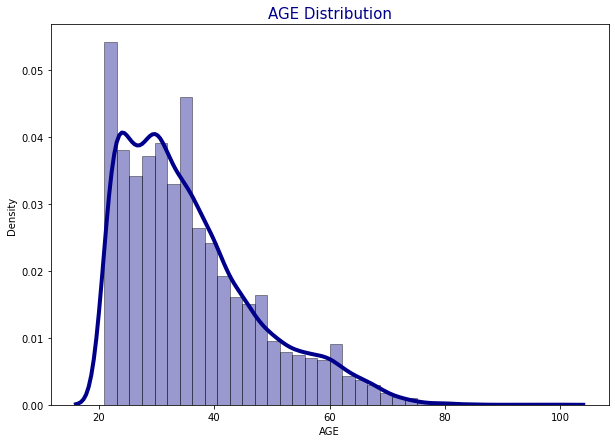

In [83]:
plt.figure(figsize = (10,7))
plt.title("AGE Distribution",fontsize = 15, color = 'darkblue') 
sns.distplot(data.AGE, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

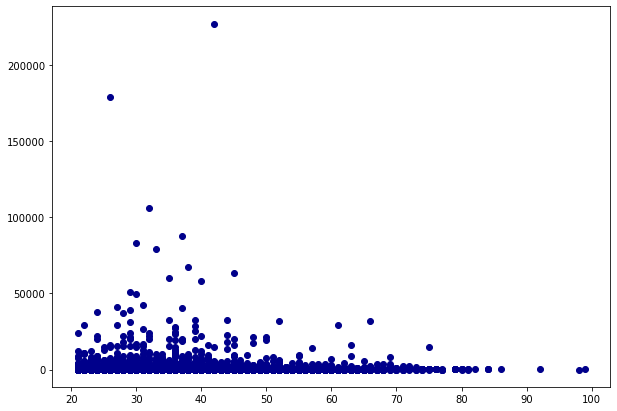

In [84]:
plt.figure(figsize = (10,7))

plt.scatter(data["AGE"], data["Avg Dep"], color = 'darkblue')
plt.show()

In [86]:
data.columns

Index(['User Id', 'AGE', 'Gender', 'Date Registered', 'First Active Date',
       'Days Last Played', 'Days Last Act', 'Avg Dep', 'Avg Ggr',
       'New United Vip Status', 'Self Blocked', 'Is Verified', '2020avg_de',
       '2021avg_de', '2020avg_ggr', '2021avg_ggr', '2020avg_ggr_count',
       '2021avg_ggr_count', '2020avg_de_count', '2021avg_de_count',
       'GGR_count', 'Dep Count', 'Churned', 'lifetime', 'player_win_lose',
       'ggr_dep_ratio'],
      dtype='object')

In [87]:
data['AVG_de'] = (data['2021avg_de'] + data['2020avg_de'])/2

In [88]:
data['AVG_de']

0        2808.491667
4           6.000000
5          33.729167
7           2.750000
8          36.452381
            ...     
25460       0.500000
25461      25.000000
25468      14.500000
25469      42.500000
25470       1.500000
Name: AVG_de, Length: 17456, dtype: float64

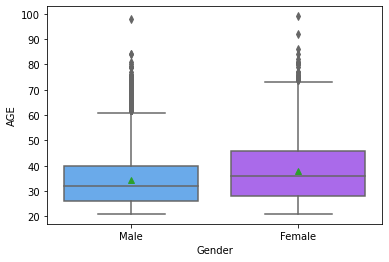

In [89]:
#for comparing Final grade with categorical variables it represented in boxplot
#We can see difference in final grades by address,Fjob teacher level,Mjob at health level,internet, schoolsup,higher.
sns.boxplot(data=data, x="Gender", y="AGE", showmeans=True, palette='cool')
plt.show()

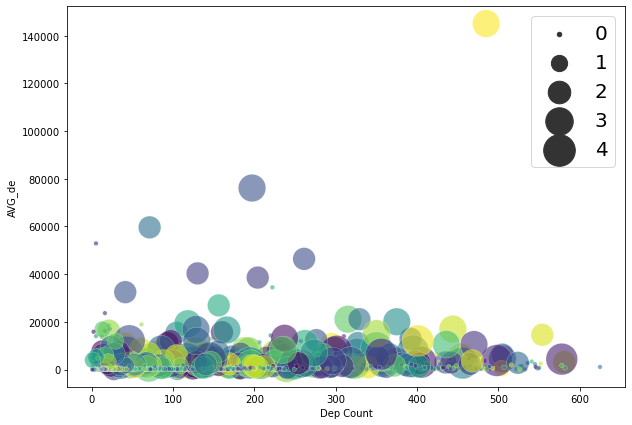

In [90]:
## work on the graph... change it 


plt.figure(figsize = (10,7))
colors = np.random.rand(17456)
sns.scatterplot(data=data, y="AVG_de", x="Dep Count", size="New United Vip Status", 
                legend=True, sizes=(20, 1000), c=colors, alpha=0.6)
plt.legend( prop={"size":20})
# show the graph
## work on the graph... change it 
plt.show()

No handles with labels found to put in legend.


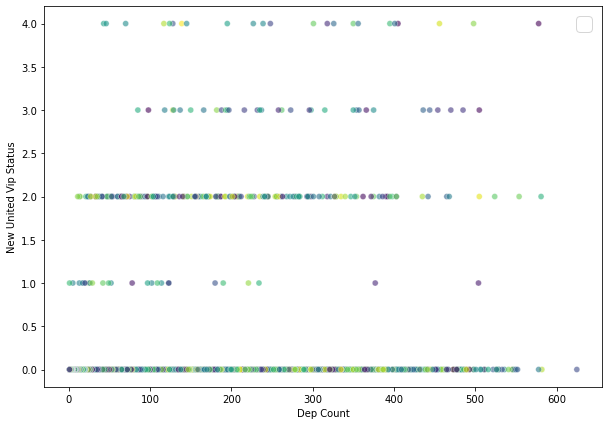

In [91]:


plt.figure(figsize = (10,7))
colors = np.random.rand(17456)
sns.scatterplot(data=data, x="Dep Count", y="New United Vip Status", 
                legend=True, sizes=(20, 1000), c=colors, alpha=0.6)
plt.legend( prop={"size":20})
# show the graph
plt.show()

No handles with labels found to put in legend.


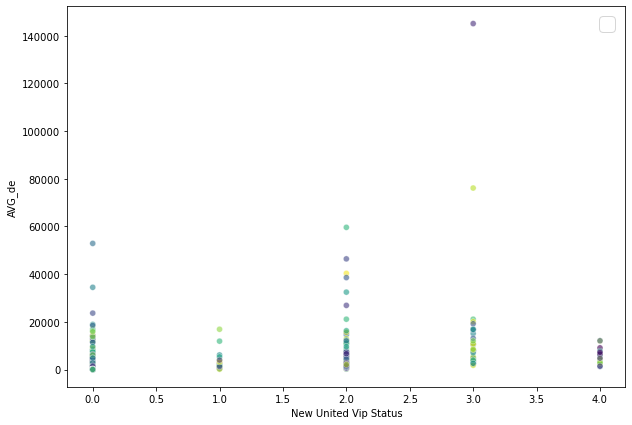

In [92]:
## work on the graph... change it 


plt.figure(figsize = (10,7))
colors = np.random.rand(17456)
sns.scatterplot(data=data, y="AVG_de", x="New United Vip Status", 
                legend=True, sizes=(20, 1000), c=colors, alpha=0.6)
plt.legend( prop={"size":20})
# show the graph
plt.show()

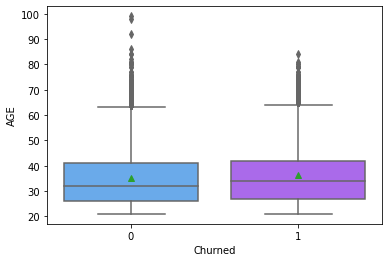

In [93]:
#for comparing Final grade with categorical variables it represented in boxplot
#We can see difference in final grades by address,Fjob teacher level,Mjob at health level,internet, schoolsup,higher.
sns.boxplot(data=data, x="Churned", y="AGE", showmeans=True, palette='cool')
plt.show()

In [94]:
data_num = data.select_dtypes(exclude = ["object"])
data_obj = data.select_dtypes(include = ["object"])

In [95]:
data_obj.columns

Index(['Gender'], dtype='object')

<AxesSubplot:>

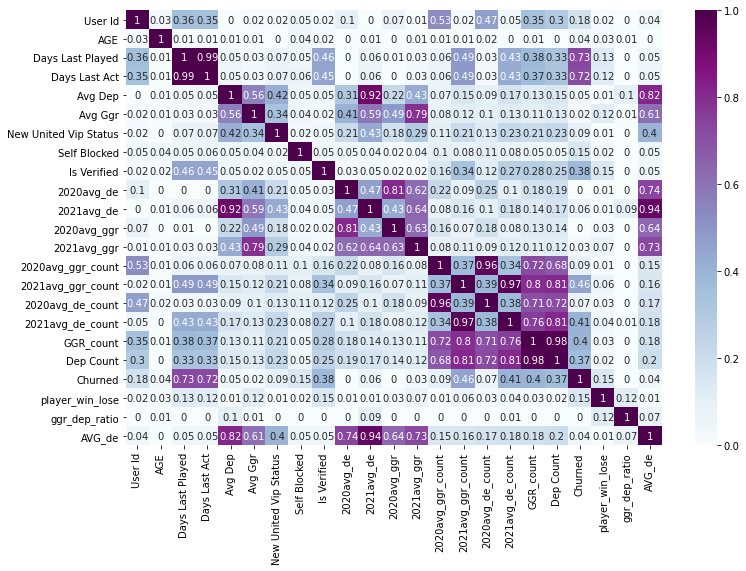

In [96]:
plt.figure(figsize = (12,8))
sns.heatmap(data_num.corr().abs().round(2), annot =True, cmap="BuPu")

In [97]:
#plt.figure(figsize = (6,4))
#sns.pairplot(data_num)


# Visual representation of pairwise relationships
# The plot is made to see the highest correlated variables with the Churn

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17456 entries, 0 to 25470
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   User Id                17456 non-null  int64          
 1   AGE                    17456 non-null  int64          
 2   Gender                 17456 non-null  object         
 3   Date Registered        17456 non-null  datetime64[ns] 
 4   First Active Date      17456 non-null  datetime64[ns] 
 5   Days Last Played       17456 non-null  int64          
 6   Days Last Act          17456 non-null  int64          
 7   Avg Dep                17456 non-null  int64          
 8   Avg Ggr                17456 non-null  int64          
 9   New United Vip Status  17456 non-null  int32          
 10  Self Blocked           17456 non-null  int32          
 11  Is Verified            17456 non-null  int32          
 12  2020avg_de             17456 non-null  float64